<a href="https://colab.research.google.com/github/PalakAggarwal13/ML_Projects/blob/main/Project_5_Loan_Status/LoanStatus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

In [2]:
from google.colab import files
uploaded = files.upload()

Saving archive (1).zip to archive (1).zip


In [7]:
import zipfile

with zipfile.ZipFile('archive (1).zip','r')as zip_ref:
  zip_ref.extractall('loan_data')

import os
print(os.listdir('loan_data'))

['train_u6lujuX_CVtuZ9i (1).csv']


In [31]:
loan_status = pd.read_csv("loan_data/train_u6lujuX_CVtuZ9i (1).csv")
loan_status.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [15]:
loan_status.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [16]:
loan_status.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [51]:
cols = ['Gender','Married','Self_Employed','Credit_History','Dependents']
for col in cols:
  mod_value = loan_status[col].mode()[0]
  loan_status[col].fillna(mod_value,inplace=True)

/tmp/ipython-input-51-1064113777.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  loan_status[col].fillna(mod_value,inplace=True)


In [23]:
loan_status.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [52]:
cols = ['LoanAmount','Loan_Amount_Term']
for col in cols:
  median_value = loan_status[col].median()
  loan_status[col].fillna(median_value,inplace=True)

/tmp/ipython-input-52-2505039429.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  loan_status[col].fillna(median_value,inplace=True)


In [53]:
loan_status.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


In [54]:
loan_status.replace({'Loan_Status':{'N':0,'Y':1}},inplace=True)

In [55]:
loan_status['Dependents'].value_counts()

,count
Dependents,
0,360
1,102
2,101
4,51


In [56]:
loan_status = loan_status.replace(to_replace='3+',value=4)

<Axes: xlabel='Education', ylabel='count'>

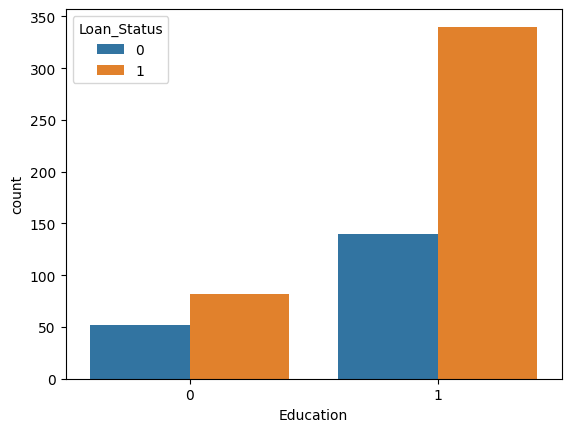

In [57]:
sns.countplot(x='Education',hue='Loan_Status',data=loan_status)

<Axes: xlabel='Married', ylabel='count'>

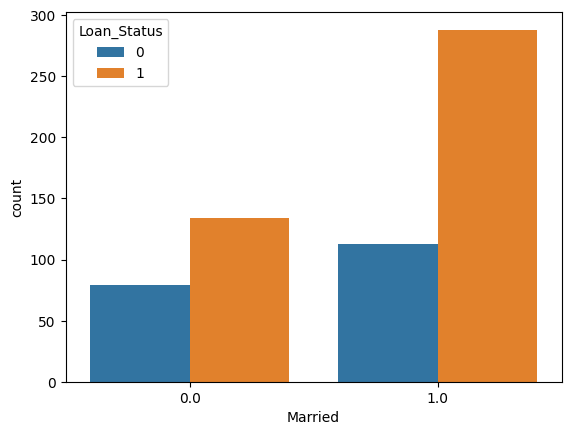

In [58]:
sns.countplot(x='Married',hue='Loan_Status',data=loan_status)

In [59]:
loan_status.replace({'Married':{'No':0 , 'Yes':1} , 'Gender':{'Male':1,'Female':0} , 'Self_Employed':{'No':0 , 'Yes':1} ,
                     'Property_Area':{'Rural':0 , 'Semiurban':1 , 'Urban':2} , 'Education':{'Graduate':1 , 'Not Graduate':0}},inplace=True)

In [60]:
X = loan_status.drop(columns=['Loan_Status','Loan_ID'],axis=1)
Y = loan_status['Loan_Status']

In [61]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)

In [65]:
import time

kernels = [('linear','linear'),
            ('poly','poly'),
             ('rbf','rbf')]
for name , kernel in kernels:
  print('{}'.format(name))
  if kernel != 'poly':
    clf = svm.SVC(kernel=kernel,C=10)
  else:
    clf = svm.SVC(kernel=kernel,C=10,degree=3)

  start = time.time()
  clf.fit(X_train,Y_train)
  preds = clf.predict(X_test)
  end = time.time()

  print('Duration:',end-start)
  print('Accuracy achieved:',accuracy_score(Y_test,preds))

linear
Duration: 190.39772939682007
Accuracy achieved: 0.8048780487804879
poly
Duration: 1.00986647605896
Accuracy achieved: 0.6910569105691057
rbf
Duration: 0.03823709487915039
Accuracy achieved: 0.6910569105691057


In [69]:
for pred in preds:
   if (pred == 0):
     print('Not approved')
   else:
     print('Approved')

Approved
Approved
Approved
Approved
Approved
Approved
Approved
Approved
Approved
Approved
Approved
Approved
Approved
Approved
Approved
Approved
Approved
Approved
Approved
Approved
Not approved
Approved
Approved
Approved
Approved
Approved
Approved
Approved
Approved
Approved
Approved
Approved
Approved
Approved
Approved
Approved
Approved
Approved
Approved
Approved
Approved
Approved
Approved
Approved
Approved
Approved
Approved
Approved
Approved
Approved
Approved
Approved
Approved
Approved
Approved
Approved
Approved
Approved
Approved
Approved
Approved
Approved
Approved
Approved
Approved
Approved
Approved
Approved
Approved
Approved
Approved
Approved
Approved
Approved
Approved
Approved
Approved
Approved
Approved
Approved
Approved
Approved
Approved
Approved
Approved
Approved
Approved
Approved
Approved
Approved
Approved
Approved
Approved
Approved
Approved
Approved
Approved
Approved
Approved
Approved
Approved
Approved
Approved
Approved
Approved
Approved
Approved
Approved
Approved
Approved
Approv

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

param_grid = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'C': [0.1, 1, 10]
}

svc = SVC()
grid = GridSearchCV(svc, param_grid, cv=5)
grid.fit(X_train, Y_train)

print("Best kernel:", grid.best_params_['kernel'])
print("Best score:", grid.best_score_)